# Homework 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

Global Fixed Income. Inflation and volatility.

## 2. Hedge Funds.

a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

Low exposure to the overall market. Good sharpe Ratio

b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

lower fees and more liquidity


## 3. The Benchmarks

a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

All give a measure in hedge fund performance and risk.
* HFRI: Index, based on how hedge funds perform.
* MLFM: Benchmark, weight average of factors which have strong correlation to hedge funds
* MLFM-ES: The MLFM has euro short rate exposure which MLFM-ES has US long rate exposure.
* HDG: ETF. similar to MLFM but is tradable

b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

Very well. .9 correlation.

c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

3-month T bills.

d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

It uses historical data to find factors correlated with hedge funds. But hedge funds are likely to switch strategies all the time. So these correlations are likely to die out as the hedge funds adopt new strategies.

## 4. The HDG Product

a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

Performance of hedge funds. They do a good job.

b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

Investing in the market is undisputably the best way to invest your money. The second best way is to invest in something uncorrelated to the market. So it doesnt make sense to put 100% of your portfolio in a hedge fund, it make sense to do the market and hedge funds.

c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

* Hedge fund: $\frac{10*.8-2}{20} = \frac{6}{20}$
* ETF: $\frac{10-1}{20} = \frac{9}{20}$

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Sep 2024`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf

if os.getcwd().split("\\")[-1] == "homework":
    os.chdir("../")

In [2]:
file_path = r"data/proshares_analysis_data.xlsx"
dfs_raw = pd.read_excel(file_path, sheet_name=None)
for key in dfs_raw.keys():
    print(f"{key}: {dfs_raw[key].shape}")
    
ticker_mapping = {tick: name 
                  for tick, name in zip(dfs_raw['descriptions'].iloc[:, 0], 
                                                dfs_raw['descriptions'].iloc[:, 1])}
ticker_mapping

descriptions: (16, 2)
hedge_fund_series: (158, 6)
merrill_factors: (158, 7)
other_data: (158, 6)


{'EEM US Equity': 'iShares MSCI Emerging Markets',
 'EFA US Equity': 'iShares MSCI EAFE ETF',
 'EUO US Equity': 'ProShares UltraShort Euro',
 'HDG US Equity': 'ProShares Hedge Replication ET',
 'HEFA US Equity': 'iShares Currency Hedged MSCI E',
 'HFRIFWI Index': 'HFR Fund Wghted Comp',
 'IWM US Equity': 'iShares Russell 2000 ETF',
 'MLEIFCTR Index': 'Merrill Lynch Factor Model Ind',
 'MLEIFCTX Index': 'Merrill Lynch Factor Model Exc',
 'QAI US Equity': 'NYLI Hedge Multi-Strategy Trac',
 'SPXU US Equity': 'ProShares UltraPro Short S&P 5',
 'SPY US Equity': 'SPDR S&P 500 ETF Trust',
 'TAIL US Equity': 'Cambria Tail Risk ETF',
 'TRVCI Index': 'FTSE Venture Capital Index',
 'UPRO US Equity': 'ProShares UltraPro S&P 500',
 'USGG3M Index': 'US Generic Govt 3 Mth'}

In [3]:
df_hedge_fund = dfs_raw['hedge_fund_series']
df_merrill = dfs_raw['merrill_factors']
df_other = dfs_raw['other_data']

for df in [df_hedge_fund, df_merrill, df_other]:
    df.set_index(df.columns[0], inplace=True)

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

,mean,std,sharpe,Excess Kurtosis,5% VaR,5% cVaR,Max Drawdown
HFRIFWI Index,0.048295,0.059476,0.812004,2.763074,-0.024293,-0.037478,0.115473
MLEIFCTR Index,0.036286,0.056136,0.646398,-1.368420,-0.028189,-0.035857,0.124302
MLEIFCTX Index,0.034605,0.055980,0.618172,-1.404137,-0.028095,-0.035816,0.124388
HDG US Equity,0.024812,0.058408,0.424805,-1.240750,-0.030932,-0.037575,0.140720
QAI US Equity,0.025653,0.050009,0.512971,-1.394066,-0.017895,-0.032695,0.137716


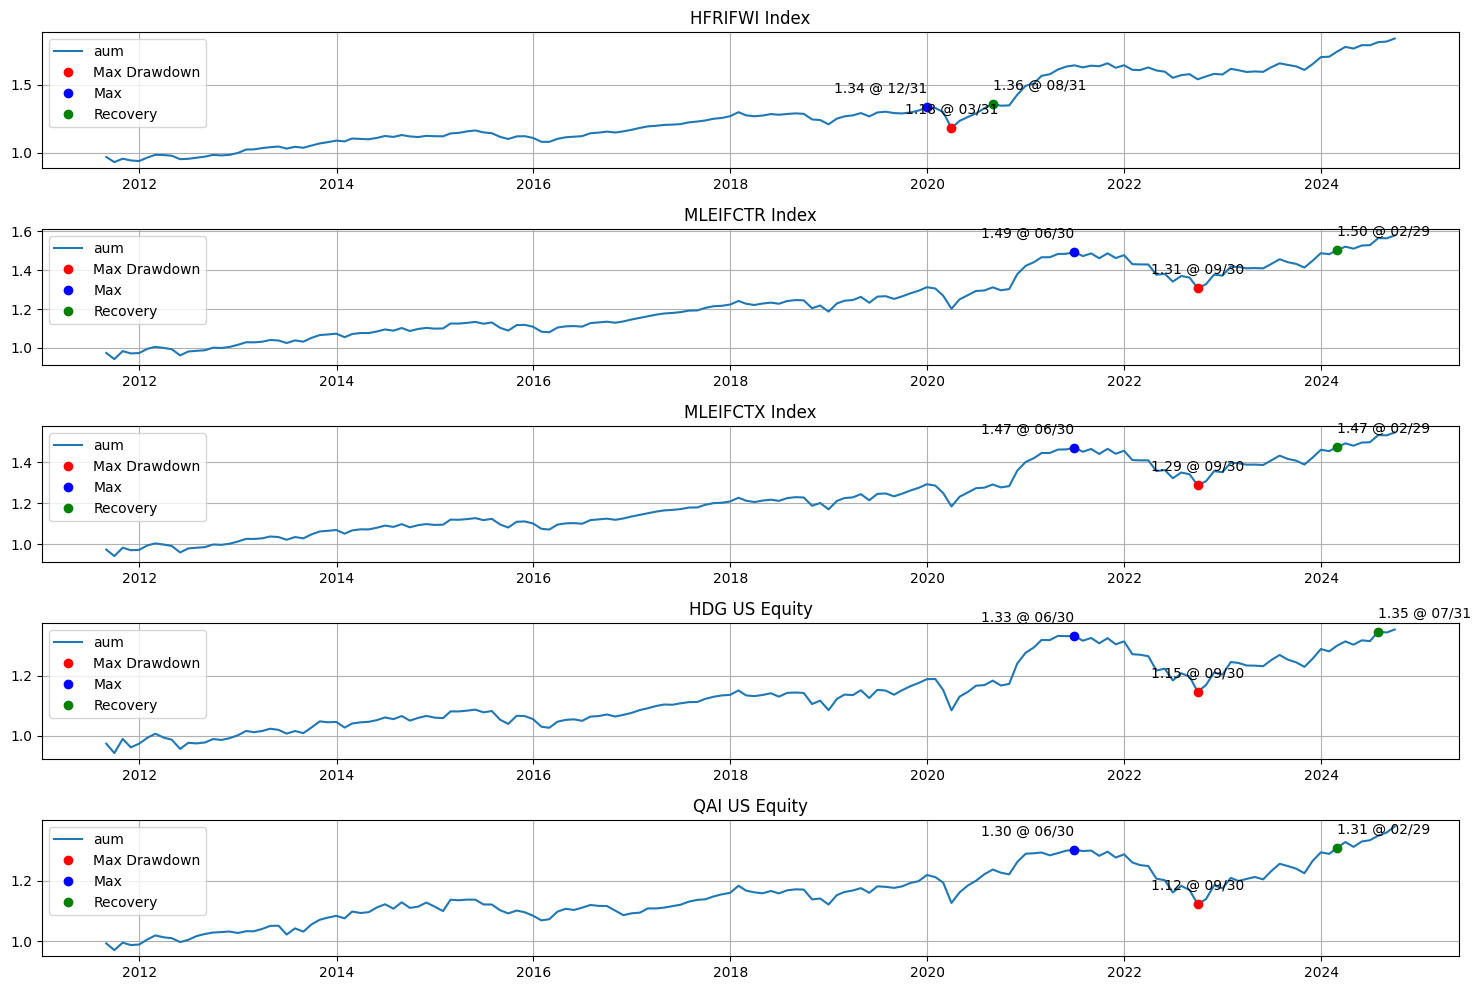

In [4]:
df_hedge_fund = dfs_raw['hedge_fund_series']

# todo include the dates of the max/min/recovery within the max drawdown period.
def plot_max_drawdown(df,figsize=(15, 10), date_format=r"%m/%d"):
    n_cols = df.shape[1]
    plt.figure(figsize=figsize)
    def format_cords(d, aum): return f"{aum:.2f} @ {d.strftime(date_format)}"
    
    max_draw_downs = []
    for i, (idx, data) in enumerate(df.T.iterrows()):
        plt.subplot(n_cols, 1, i+1)
        aum = (data+1).cumprod()
        plt.plot(aum, label="aum")
        plt.title(df.columns[i])
        
        aum = (data+1).cumprod()
        
        # Plot the dates of the max/min/recovery within the max drawdown period.
        draw_downs = (aum.cummax() - aum) / aum.cummax()
        max_draw_down_date = draw_downs.idxmax()
        max_draw_down = draw_downs[max_draw_down_date]
        aum_at_max_draw_down = aum.loc[max_draw_down_date]
        plt.plot(max_draw_down_date, aum_at_max_draw_down, "ro", label="Max Drawdown")
        plt.annotate(format_cords(max_draw_down_date, aum_at_max_draw_down),
                     (max_draw_down_date, aum_at_max_draw_down), 
                     textcoords="offset points", xytext=(0, 10), ha='center')
        
        # date of max
        max_date = aum.loc[:max_draw_down_date].idxmax()
        max_aum = aum.loc[max_date]
        plt.plot(max_date, max_aum, "bo", label="Max")
        plt.annotate(format_cords(max_date, max_aum),
                     (max_date, max_aum), 
                     textcoords="offset points", xytext=(0, 10), ha='right')
        
        # Recovery if there is one
        recoverys = aum.index[(aum >= max_aum) & (aum.index > max_date)]
        if len(recoverys) > 0:
            recovery_date = recoverys[0]
            recovery_aum = aum.loc[recovery_date]
            plt.plot(recovery_date, recovery_aum, "go", label="Recovery")
            plt.annotate(format_cords(recovery_date, recovery_aum),
                         (recovery_date, recovery_aum), 
                         textcoords="offset points", xytext=(0, 10), ha='left')
        plt.tight_layout()
        plt.legend(loc='upper left')
        plt.grid()
    return max_draw_downs


def calc_summary(df, scale=1):
    df_summary = df.apply(lambda x: pd.Series({
        "mean": x.mean() * scale,
        "std": x.std() * np.sqrt(scale),
        "sharpe": x.mean() / x.std() * np.sqrt(scale),
        "Excess Kurtosis": x.kurtosis() - 3,
        "5% VaR": x.quantile(0.05),
        "5% cVaR": x[x <= x.quantile(0.05)].mean(),
    }))
    
    # Find max_draw_downs
    df_aum = (df+1).cumprod()
    draw_downs = (df_aum.cummax() - df_aum) / df_aum.cummax()
    df_summary.loc["Max Drawdown"] = draw_downs.max()
    return df_summary

df_summary = (calc_summary(df_hedge_fund, scale=12)
              # .rename(columns=ticker_mapping)
              ).T

plot_max_drawdown(df_hedge_fund)

display(df_summary)
plt.show()

## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [5]:
df_main = df_hedge_fund.copy()
index_cols = df_main.columns

# Add market
market_col = "SPY US Equity"
df_main[market_col] = dfs_raw["merrill_factors"][market_col]

# Clean cols
ticker_mapping_short = {k.split(" ")[0]: k for k in ticker_mapping.keys()}
ticker_mapping_short_reverse = {k: k.split(" ")[0] for k in ticker_mapping.keys()}
df_main = df_main.rename(columns=ticker_mapping_short_reverse)
market_col = ticker_mapping_short_reverse[market_col]
index_cols = [ticker_mapping_short_reverse[c] for c in index_cols]


for c in index_cols:
    df_main[c + "_adj"] = df_main[c] - df_main[market_col]
display(df_main.head())

,HFRIFWI,MLEIFCTR,MLEIFCTX,HDG,QAI,SPY,HFRIFWI_adj,MLEIFCTR_adj,MLEIFCTX_adj,HDG_adj,QAI_adj
Unnamed: 0,,,,,,,,,,,
2011-08-31,-0.032149,-0.025588,-0.025689,-0.027036,-0.006489,-0.054976,0.022827,0.029388,0.029287,0.027940,0.048487
2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022141,-0.069420,0.030517,0.037006,0.036828,0.036954,0.047279
2011-10-31,0.026858,0.043593,0.043320,0.050531,0.025239,0.109147,-0.082289,-0.065554,-0.065827,-0.058616,-0.083908
2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007964,-0.004064,-0.009390,-0.008078,-0.008367,-0.024544,-0.003901
2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001822,0.010449,-0.014928,-0.008511,-0.008653,0.002425,-0.008627


In [6]:
def factor_model(df, y_var, x_vars, intercept=True):
    if not isinstance(x_vars, list):
        x_vars = [x_vars]
    # Run regression
    formula = f"{y_var} ~ {' + '.join(x_vars)}"
    if not intercept:
        formula = formula + " - 1"
    model = smf.ols(formula=formula, data=df)
    results = model.fit()
    summary = results.summary()
    
    return model, results

def get_market_beta(x_vals, include_alpha=True):
    market_vals = df_main.loc[x_vals.index, market_col]
    
    if include_alpha:
        model = sm.OLS(x_vals, sm.add_constant(market_vals))
        results = model.fit()
        alpha = results.params["const"]
    else:
        model = sm.OLS(x_vals, market_vals)
        results = model.fit()
        alpha = np.nan
        
    beta = results.params[market_col]
    r_sqrd = results.rsquared
    tracking_err = results.resid.std()
    return beta, alpha, r_sqrd, tracking_err

def display_market_beta(x_vals, include_alpha=True):
    beta, alpha, r_sqrd, tracking_err = get_market_beta(x_vals, include_alpha=True)
    if include_alpha:
        print(f"Alpha: {alpha:.4f}")
    print(f"Market Beta: {beta:.4f}")
    print(f"R-squared: {r_sqrd:.2f}")
    print(f"Tracking Error: {tracking_err:.2f}")
    

def risk_summary(df, index_cols, market_col, annual_scale = 12):
    
    data = []
    for c in index_cols:
        _, results = factor_model(df, c, market_col)
        market_beta = results.params[market_col]
        
        mu_return = df[c].mean() * annual_scale
        mu_adj_return = df[c + "_adj"].mean() * annual_scale
        vol_adj = df[c + "_adj"].std() * np.sqrt(annual_scale)
        
        data.append({
            "Market Beta": market_beta,
            "Trenor Ratio": mu_return / market_beta,
            "Info. Ratio": mu_adj_return / vol_adj,
        })
    return pd.DataFrame(data)

risk_summary(df_main, index_cols, market_col)

,Market Beta,Trenor Ratio,Info. Ratio
0,0.346131,0.139528,-0.945304
1,0.343383,0.105672,-1.080102
2,0.342171,0.101134,-1.095259
3,0.352053,0.070478,-1.202858
4,0.298376,0.085976,-1.118712


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

todo

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

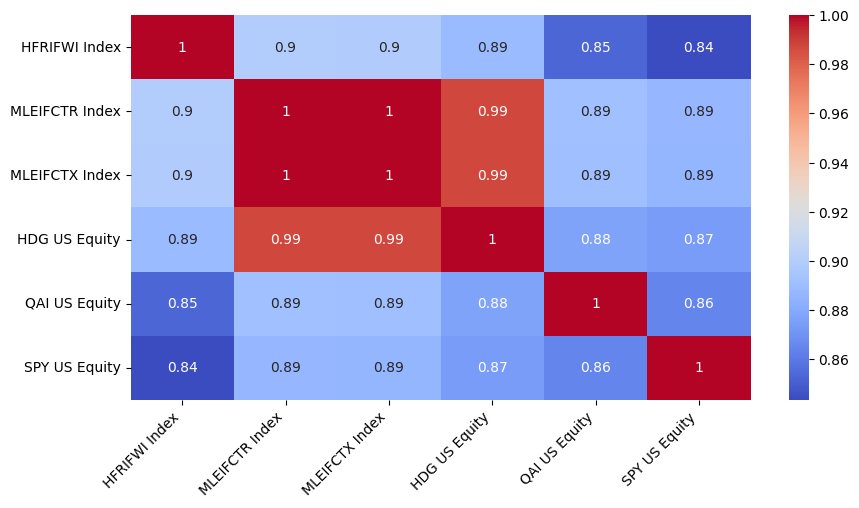

In [7]:
df_corr = (df_main[[c for c in df_main if "_adj" not in c]]
           .rename(columns=ticker_mapping_short)
           .corr()
           )

# Plot with seaborn
plt.figure(figsize=(10, 5))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.show()

* Highest: Corr(MLEIFCTR Index, MLEIFCTx Index) = 1
* Lowest: Corr(HFRIFWI Index, SPY US Equity) = 1

## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.
b. Are the betas realistic position sizes, or do they require huge long-short positions?
c. Report the R-squared.
d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [8]:
df_reg = dfs_raw["merrill_factors"].copy()
factor_cols = df_reg.columns

# Clean cols
df_reg = df_reg.rename(columns=ticker_mapping_short_reverse)
factor_cols = [ticker_mapping_short_reverse[c] for c in factor_cols]

y_var = "HFRIFWI"
df_reg[y_var] = df_main[y_var]
display(df_reg.head())

,SPY,USGG3M,EEM,EFA,EUO,IWM,HFRIFWI
Unnamed: 0,,,,,,,
2011-08-31,-0.054976,0.000009,-0.092549,-0.087549,-0.005889,-0.088913,-0.032149
2011-09-30,-0.069420,0.000017,-0.179063,-0.108082,0.142180,-0.111505,-0.038903
2011-10-31,0.109147,-0.000013,0.162986,0.096274,-0.069502,0.151011,0.026858
2011-11-30,-0.004064,0.000000,-0.019724,-0.021765,0.054627,-0.003784,-0.013453
2011-12-31,0.010449,0.000009,-0.042649,-0.021744,0.075581,0.005144,-0.004479


In [9]:
hfri_model, hfri_results = factor_model(df_reg, y_var, factor_cols)
hfri_params = hfri_results.params
# display(hfri_results.summary())

print(f"Intercept: {hfri_params['Intercept']:.2f}")
print(f"Betas:")
for f in factor_cols:
    print(f" - {f}: {hfri_params[f]:.2f}")
    
print(f"R-squared: {hfri_results.rsquared:.2f}")
print(f"Tracking Error: {hfri_results.resid.std():.2f}")

Intercept: 0.00
Betas:
 - SPY: 0.04
 - USGG3M: 0.15
 - EEM: 0.08
 - EFA: 0.08
 - EUO: 0.03
 - IWM: 0.15
R-squared: 0.84
Tracking Error: 0.01


b. Are the betas realistic position sizes, or do they require huge long-short positions?

The betas are realistic. They are all around .10

## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [10]:
def rolling_regression(df, windows_size, y_var, factor_cols, start_idx=None, end_idx=None, intercept=True):
    start_idx = start_idx if start_idx is not None else windows_size
    end_idx = end_idx if end_idx is not None else df.shape[0]
    
    print(f"Running {end_idx-start_idx} regression from {start_idx} to {end_idx} with window size {windows_size}")
    
    rolling_models = []
    rolling_results = []
    rolling_estimates = []
    for curr_t_idx in range(start_idx, end_idx):
        df_slice = df.iloc[curr_t_idx-windows_size:curr_t_idx]
        
        model, results = factor_model(df_slice, y_var, factor_cols, intercept=intercept)
        rolling_models.append(model)
        rolling_results.append(results)
    
        # out of sample performance
        # todo check this
        curr_y_est = results.predict(df.iloc[curr_t_idx])
        rolling_estimates.append(curr_y_est)
    
    rolling_estimates = pd.concat(rolling_estimates)
    rolling_estimates.name = "rolling_fitted"
    return rolling_models, rolling_results, rolling_estimates
    
window_size = 60
rolling_models, rolling_results, rolling_fitted_returns = rolling_regression(df_reg, window_size, y_var, factor_cols)
display(rolling_fitted_returns.head())

Running 98 regression from 60 to 158 with window size 60


2016-08-31    0.004966
2016-09-30    0.005001
2016-10-31   -0.004449
2016-11-30    0.011651
2016-12-31    0.007650
Name: rolling_fitted, dtype: float64

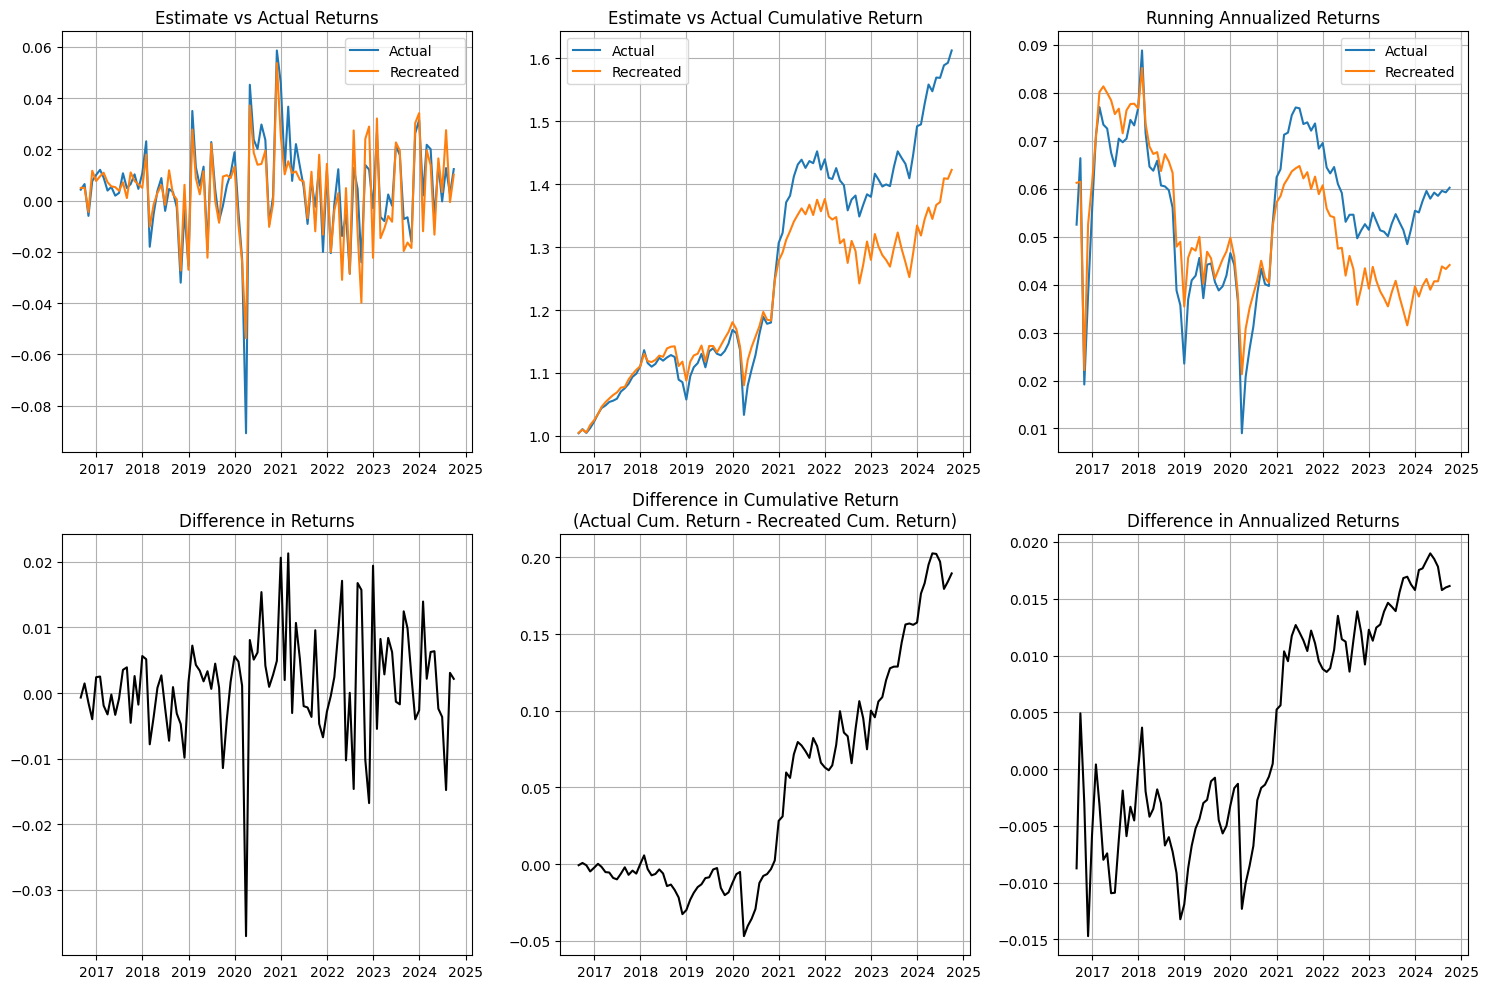

In [11]:
plt.figure(figsize=(15, 10))
df_plot = pd.DataFrame()

# Monthly Returns
df_plot["recreated_r"] = rolling_fitted_returns
df_plot["actual_r"] = df_reg[y_var]
df_plot["diff_r"] = df_plot["actual_r"] - df_plot["recreated_r"]

# Cumulative Returns
df_plot["actual_cr"] = (df_plot["actual_r"] + 1).cumprod()
df_plot["recreated_cr"] = (df_plot["recreated_r"] + 1).cumprod()
df_plot["diff_in_cr"] = df_plot["actual_cr"] - df_plot["recreated_cr"]

# Running Annualized Return
n_vec = np.arange(len(df_plot)) + 1
df_plot["actual_ar"] = df_plot["actual_cr"] ** (12/n_vec) - 1
df_plot["recreated_ar"] = df_plot["recreated_cr"] ** (12/n_vec) - 1
df_plot["diff_in_ar"] = df_plot["actual_ar"] - df_plot["recreated_ar"]

num_x_plots = 3
num_y_plots = 2
curr_plot = 1

# Plot both returns
plt.subplot(num_y_plots, num_x_plots, curr_plot)
plt.title("Estimate vs Actual Returns")
plt.plot(df_plot["actual_r"], label="Actual")
plt.plot(df_plot["recreated_r"], label="Recreated")
plt.legend()
plt.grid()
curr_plot += 1

# Plot cum returns
plt.subplot(num_y_plots, num_x_plots, curr_plot)
plt.title("Estimate vs Actual Cumulative Return")
plt.plot(df_plot["actual_cr"], label="Actual")
plt.plot(df_plot["recreated_cr"], label="Recreated")
plt.legend()
plt.grid()
curr_plot += 1

# Plot Running Annualized Returns
plt.subplot(num_y_plots, num_x_plots, curr_plot)
plt.title("Running Annualized Returns")
plt.plot(df_plot["actual_ar"], label="Actual")
plt.plot(df_plot["recreated_ar"], label="Recreated")
plt.legend()
plt.grid()
curr_plot += 1

###########################

# Plot Difference rteturn
plt.subplot(num_y_plots, num_x_plots, curr_plot)
plt.title("Difference in Returns")
plt.plot(df_plot["diff_r"], color="k")
plt.grid()
curr_plot += 1

# Plot Difference in cumreturn
plt.subplot(num_y_plots, num_x_plots, curr_plot)
plt.title("Difference in Cumulative Return\n"
          "(Actual Cum. Return - Recreated Cum. Return)")
plt.plot(df_plot["diff_in_cr"], color="k")
plt.grid()
curr_plot += 1

# Plot Difference in Annualized Returns
plt.subplot(num_y_plots, num_x_plots, curr_plot)
plt.title("Difference in Annualized Returns")
plt.plot(df_plot["diff_in_ar"], color="k")
plt.grid()
curr_plot += 1

###########################

plt.tight_layout()
plt.show()

The recreated portfolio does a good job of recreated the HFRI return. It does fall short at times, espeically in the later years. At the end we are looking at difference of 2% average annual return. For cumulative return, the recreated portfolio is about 20% lower than the HFRI.

It would be interesting to see if this portfolio retained the alpha of the hedge funds, or if it just took all the beta.

In [12]:
display_market_beta(rolling_fitted_returns)

Alpha: -0.0006
Market Beta: 0.3484
R-squared: 0.83
Tracking Error: 0.01


We can see that this reconstruction has higher beta and lower alpha. The big attraction about hedge funds is that they are uncorrelated with the market. I believe this reconstruction severaly miscaptures this.

## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

In [15]:
hfri_fitted_returns

NameError: name 'hfri_fitted_returns' is not defined

In [18]:
# todo, is this rolling?

hfri_model_no_int, hfri_results_no_int = factor_model(df_reg, y_var, factor_cols, intercept=False)

print("HFRI with Intercept")
print("-------------------")
hfri_fitted_returns = hfri_results.fittedvalues
display_market_beta(hfri_fitted_returns)
print("")

print("HFRI with no Intercept")
print("----------------------")
hfri_fitted_returns_no_int = hfri_results_no_int.fittedvalues
display_market_beta(hfri_fitted_returns_no_int)

HFRI with Intercept
-------------------
Alpha: -0.0001
Market Beta: 0.3461
R-squared: 0.85
Tracking Error: 0.01

HFRI with no Intercept
----------------------
Alpha: -0.0009
Market Beta: 0.3511
R-squared: 0.86
Tracking Error: 0.01


In [20]:
# * the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?
print(f"Mean of the fitted returns (w Intercept): {hfri_fitted_returns.mean()}")
print(f"Mean of the fitted returns (w no Intercept): {hfri_fitted_returns_no_int.mean()}")


Mean of the fitted returns (w Intercept): 0.004024576917345148
Mean of the fitted returns (w no Intercept): 0.003295211275663281


The mean with the intercept has a slightly higher average monthly return

In [21]:

# * the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

hfri_corr = pd.concat([hfri_fitted_returns, df_reg[y_var]], axis=1).corr().iloc[0, 1]
hfri_corr_no_int = pd.concat([hfri_fitted_returns_no_int, df_reg[y_var]], axis=1).corr().iloc[0, 1]

print(f"Correlation of fitted returns (w Intercept) to HFRI: {hfri_corr:.2f}")
print(f"Correlation of fitted returns (w no Intercept) to HFRI: {hfri_corr_no_int:.2f}")

Correlation of fitted returns (w Intercept) to HFRI: 0.92
Correlation of fitted returns (w no Intercept) to HFRI: 0.92


These are very similar

I dont think they fit it with an intercept because they would have no way to recreate a constant return.

***

# 3.  Extensions
<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. 

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

## 2. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

## 3. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

***